**Kelompok 11 2024 A**

**Anggota:**
1. Aulia Aziza (24031554102)
2. Audy Alycia (24031554179)

# Integrasi

In [ ]:
import pandas as pd
import os
import re

folder_path = "/content/drive/MyDrive/DATA UAS DATAWRANGLING/data wrangling uas"

#list daftar daerah sebagai tabel master untuk key saat merge
daftar_daerah = [
    'Ponorogo', 'Trenggalek', 'Tulungagung', 'Blitar', 'Kediri', 'Malang',
    'Lumajang', 'Jember', 'Banyuwangi', 'Bondowoso', 'Situbondo', 'Probolinggo',
    'Pasuruan', 'Sidoarjo', 'Mojokerto', 'Jombang', 'Nganjuk', 'Madiun', 'Magetan',
    'Ngawi', 'Bojonegoro', 'Tuban', 'Lamongan', 'Gresik', 'Bangkalan', 'Sampang',
    'Pamekasan', 'Sumenep', 'Kota Kediri', 'Kota Blitar', 'Kota Malang', 'Kota Probolinggo',
    'Kota Pasuruan', 'Kota Mojokerto', 'Kota Madiun', 'Kota Surabaya', 'Kota Batu', 'Jawa Timur'
]

df_integrated = pd.DataFrame({"daerah": daftar_daerah}) #membuat dataframe awal yang hanya memiliki kolom daerah

all_raw_frames = {} #dictionary untuk menyimpan raw file

In [ ]:
#collecting
for file in os.listdir(folder_path): #membaca semua file dalam folder
    if not (file.endswith(".xlsx") or file.endswith(".xls")): #hanya memproses file excel
        continue

    filepath = os.path.join(folder_path, file) #path
    df_raw = pd.read_excel(filepath, header=None) #baca tanpa header
    all_raw_frames[file] = df_raw #menyimpan ke dictionary dengan nama file sebagai key

# Cleaning + Structuring

In [ ]:
#cleaning
def clean_daerah(n):
    if pd.isna(n):
        return None #nilai kosong keluarannya jadi noneee
    n = str(n).strip() #mengubah ke string dan hps spasi berlebih
    n = re.sub(r"(?i)^kabupaten\s+", "", n) #hapus kabupaten
    n = re.sub(r"(?i)^kab\.\s*", "", n) #hapus kab
    n = re.sub(r"(?i)^kota\s+", "Kota ", n) #menyeragamkan format kota jadi Kota ...
    return n.strip() #menghapus spasi berlebih abis regex

In [ ]:
df_cleaned_final = df_integrated.copy() #salinan dataframe master

for file, df_raw in all_raw_frames.items(): #mulai proses pembersihan dan penggabungan

    header_row = 2 #baca header dari index 2
    header = df_raw.iloc[header_row].astype(str).str.strip() #header sebagai string
    #structuring
    df = df_raw.iloc[header_row+1:].reset_index(drop=True) #data baris setelah header
    df.columns = header #kolom sesuai header

    df = df.dropna(axis=1, how="all") #menghapus kolom yang isinya nan semua

    kolom_daerah = [c for c in df.columns if "kota" in c.lower() or
                    "kab" in c.lower() or
                    "nama" in c.lower()] #mencari kolom nama daerah dengan mencari kata kata tersebut

    if len(kolom_daerah) == 0: #kalau tidak ditemukan, pake kolom pertama sebagai nama daerah
        kolom_daerah = [df.columns[0]]

    kolom_daerah = kolom_daerah[0] #mengambil data pertama dari kolom_daerah menjadikannya string nama kolom

    kolom_nilai = [c for c in df.columns if c != kolom_daerah][0] #menentukan kolom nilai indikator selain kolom daerah

    df[kolom_nilai] = (
        df[kolom_nilai]
        .astype(str)
        .str.replace(r"[^0-9,.-]", "", regex=True) #menghapus karakter non angka
        .str.replace(",", ".", regex=False) #mengganti koma dengan titik
        .astype(float) #mengubah tipe data ke float
    )

    df[kolom_daerah] = df[kolom_daerah].apply(clean_daerah) #membersihkan nama daerah

    judul_kolom = os.path.splitext(file)[0]

    seri = df[[kolom_daerah, kolom_nilai]].rename(
        columns={kolom_daerah: "daerah", kolom_nilai: judul_kolom}
    ) #membuat dataframe hanya dengan kolom daerah dan kolom valuesnya
    #integratig
    df_cleaned_final = df_cleaned_final.merge(seri, on="daerah", how="left") #merge ke df utama berdasarkan kolom daerah

In [ ]:
output_csv = "/content/drive/MyDrive/Data UAS_final_bersih.csv"
df_cleaned_final.to_csv(output_csv, index=False, encoding="utf-8-sig") #exporting

In [ ]:
df_cleaned_final.head()

,daerah,"Harapan Lama Sekolah, 2024","Harapan Lama Sekolah, 2023","Harapan Lama Sekolah, 2022","Harapan Lama Sekolah, 2021","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2020","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2021","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2022","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2023","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2024","Harapan Lama Sekolah, 2020"
0,Ponorogo,13.78,13.77,13.76,13.74,9.95,10.26,9.32,9.53,9.11,13.73
1,Trenggalek,12.63,12.62,12.50,12.47,11.62,12.14,10.96,10.63,10.50,12.35
2,Tulungagung,13.36,13.34,13.33,13.32,7.33,7.51,6.71,6.53,6.28,13.31
3,Blitar,12.67,12.65,12.64,12.63,9.33,9.65,8.71,8.69,8.16,12.46
4,Kediri,13.63,13.62,13.61,13.44,11.40,11.64,10.65,10.72,9.95,13.15


# EDA

In [ ]:
import pandas as pd
import os #baca file dalam folder
import matplotlib.pyplot as plt #visualisasi standar
import seaborn as sns #visualisasi statistik
import numpy as np
import statsmodels.api as sm #untuk regresi

# Cek struktur data dan missing value

In [ ]:
df_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   daerah                                                                 38 non-null     object 
 1   Harapan Lama Sekolah, 2024                                             38 non-null     float64
 2   Harapan Lama Sekolah, 2023                                             38 non-null     float64
 3   Harapan Lama Sekolah, 2022                                             38 non-null     float64
 4   Harapan Lama Sekolah, 2021                                             38 non-null     float64
 5   Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2020  38 non-null     float64
 6   Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2021  38 non-null     float

In [ ]:
df_cleaned_final.isna().sum() #menghitung missing values (validating)

,0
daerah,0
"Harapan Lama Sekolah, 2024",0
"Harapan Lama Sekolah, 2023",0
"Harapan Lama Sekolah, 2022",0
"Harapan Lama Sekolah, 2021",0
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2020",0
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2021",0
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2022",0
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2023",0
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2024",0


In [ ]:
df_cleaned_final.describe()

,"Harapan Lama Sekolah, 2024","Harapan Lama Sekolah, 2023","Harapan Lama Sekolah, 2022","Harapan Lama Sekolah, 2021","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2020","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2021","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2022","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2023","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2024","Harapan Lama Sekolah, 2020"
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,13.601316,13.537105,13.497368,13.417632,10.930526,11.224211,10.235789,10.205789,9.695789,13.333421
std,0.891134,0.873820,0.888749,0.893059,4.530107,4.677863,4.230875,4.285001,4.177504,0.910115
min,11.980000,11.970000,11.910000,11.730000,3.890000,4.090000,3.790000,3.310000,3.060000,11.600000
25%,13.027500,12.932500,12.870000,12.840000,7.712500,7.785000,7.265000,7.187500,6.517500,12.725000
50%,13.495000,13.485000,13.410000,13.345000,10.250000,10.560000,9.630000,9.665000,9.215000,13.235000
75%,14.017500,14.007500,13.997500,13.770000,12.752500,13.110000,12.102500,12.110000,11.645000,13.730000
max,15.790000,15.770000,15.760000,15.750000,22.780000,23.760000,21.610000,21.760000,20.830000,15.510000


# Distribusi Variabel

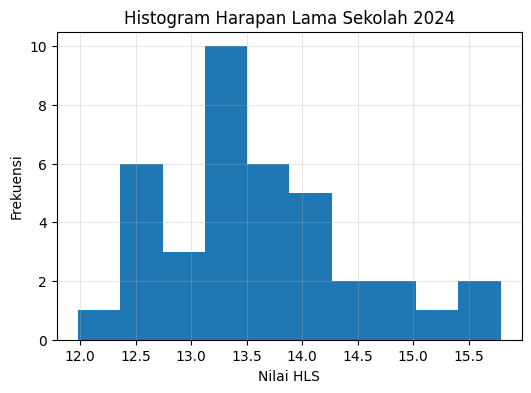

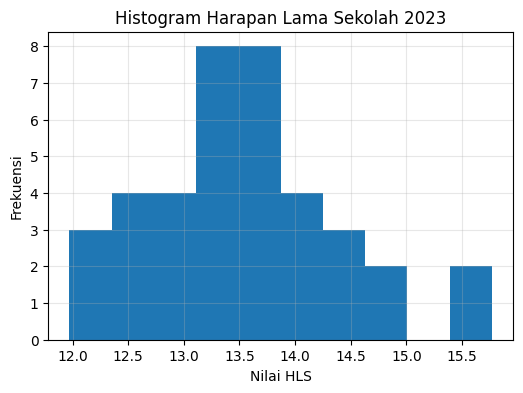

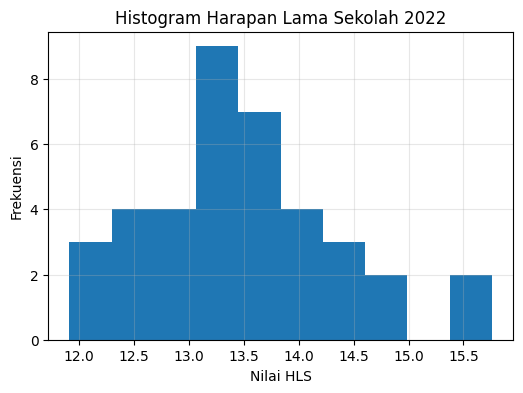

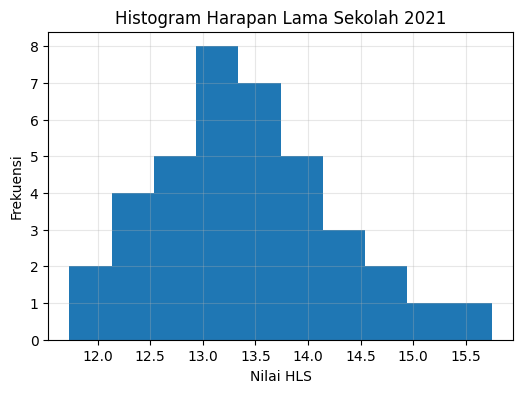

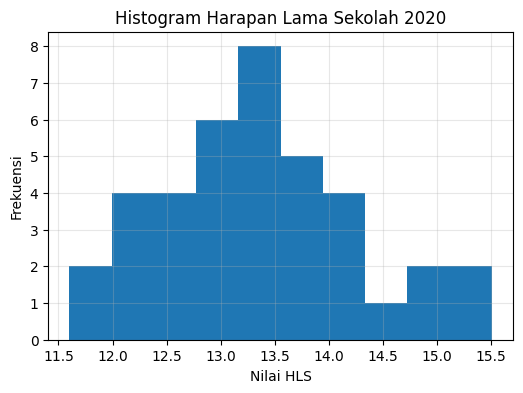

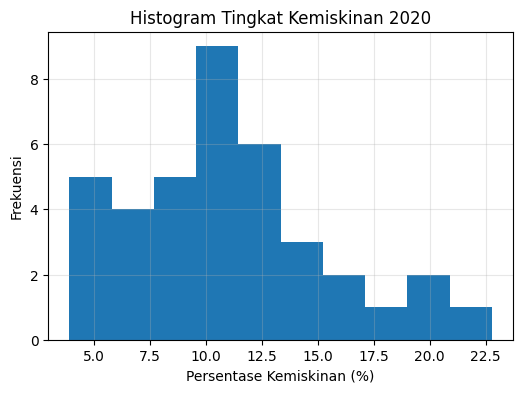

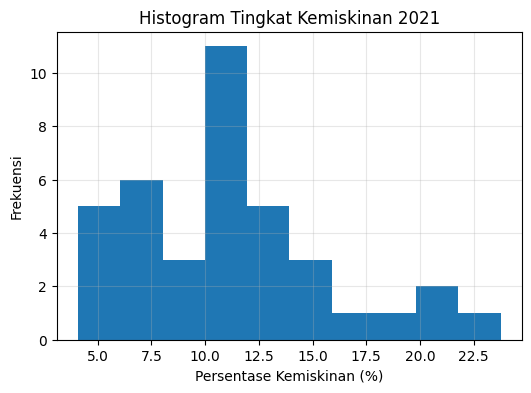

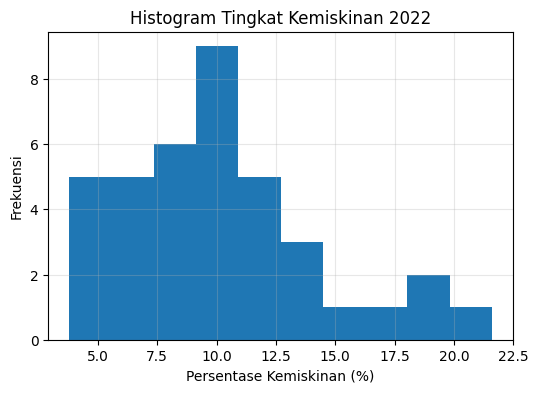

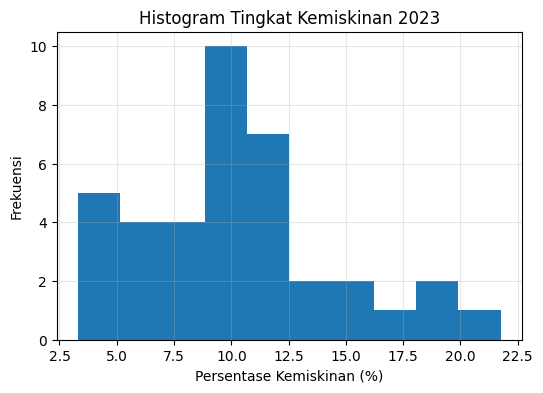

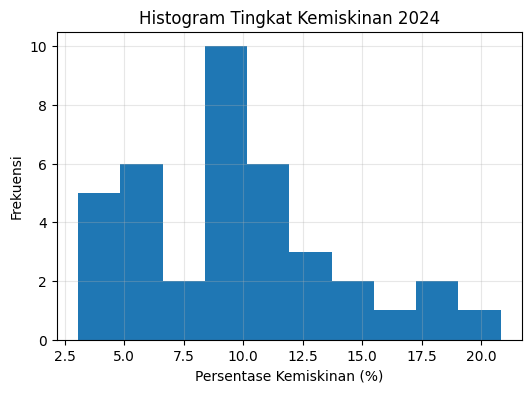

In [ ]:
hls_cols = [c for c in df_cleaned_final.columns if "Harapan Lama Sekolah" in c] #mencari yang engandung hls
miskin_cols = [c for c in df_cleaned_final.columns if "Penduduk Miskin" in c] #mencari semua kolom yang mengandung penduduk miskin

for col in hls_cols:
    plt.figure(figsize=(6,4)) #ukurannya
    plt.hist(df_cleaned_final[col].dropna(), bins=10) #histogram tanpa na, 10 bins
    tahun = col[-4:] #tahun dari nama kolom
    plt.title(f"Histogram Harapan Lama Sekolah {tahun}")
    plt.xlabel("Nilai HLS")
    plt.ylabel("Frekuensi")
    plt.grid(True, alpha=0.3)
    plt.show()

for col in miskin_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df_cleaned_final[col].dropna(), bins=10)
    tahun = col[-4:]
    plt.title(f"Histogram Tingkat Kemiskinan {tahun}")
    plt.xlabel("Persentase Kemiskinan (%)")
    plt.ylabel("Frekuensi")
    plt.grid(True, alpha=0.3)
    plt.show()

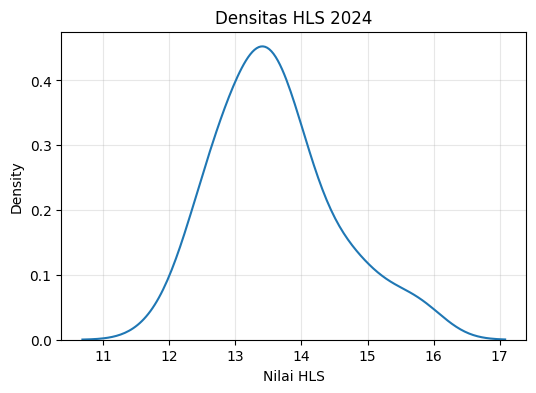

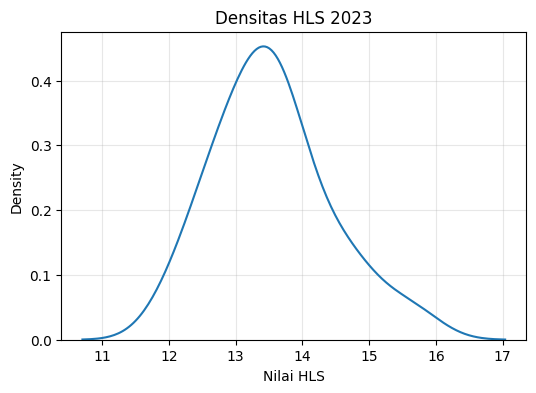

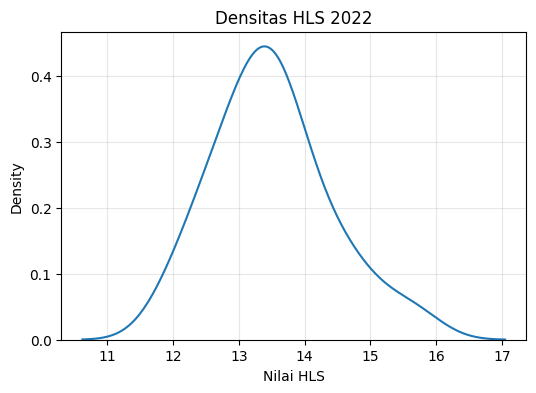

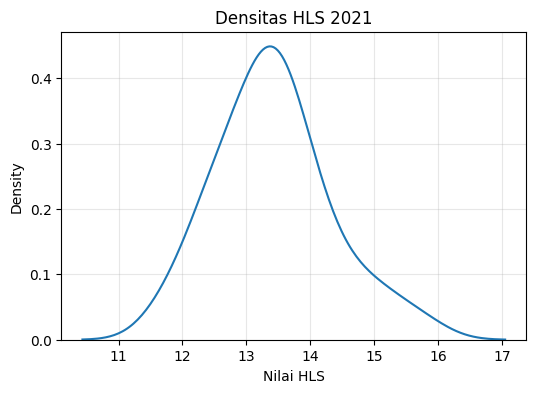

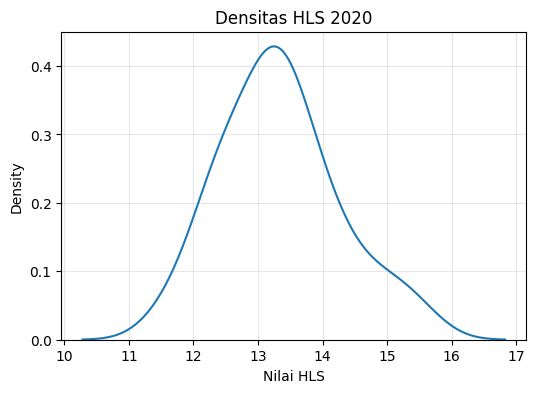

In [ ]:
  for col in hls_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_cleaned_final[col].dropna())
    tahun = col[-4:]
    plt.title(f"Densitas HLS {tahun}")
    plt.xlabel("Nilai HLS")
    plt.grid(True, alpha=0.3)
    plt.show()

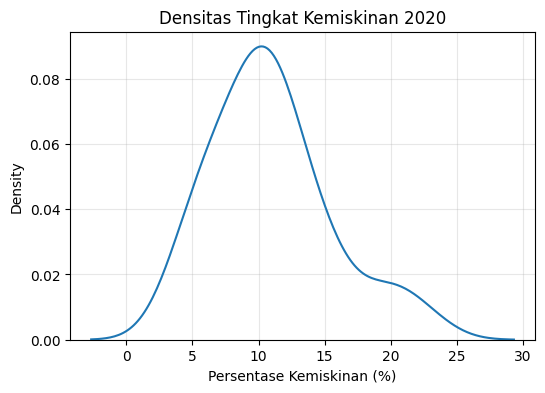

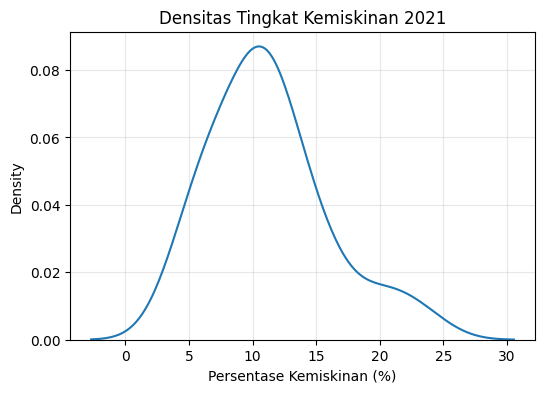

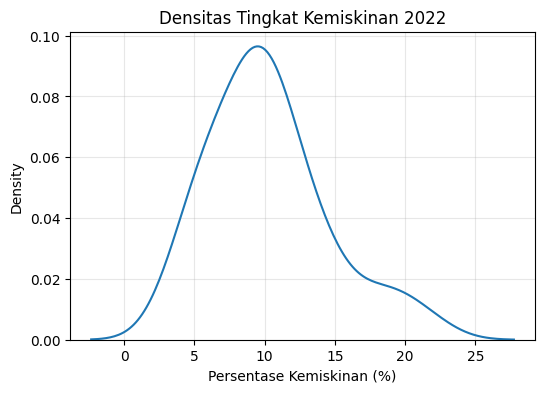

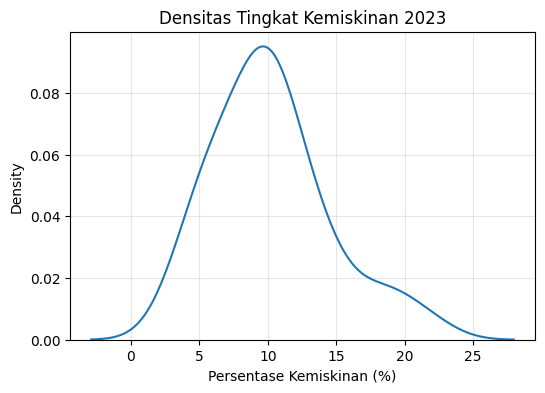

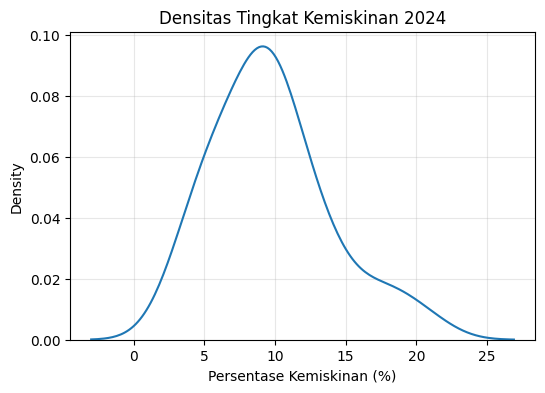

In [ ]:
for col in miskin_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_cleaned_final[col].dropna())
    tahun = col[-4:]
    plt.title(f"Densitas Tingkat Kemiskinan {tahun}")
    plt.xlabel("Persentase Kemiskinan (%)")
    plt.grid(True, alpha=0.3)
    plt.show()

# Boxplot Analisis Outlier

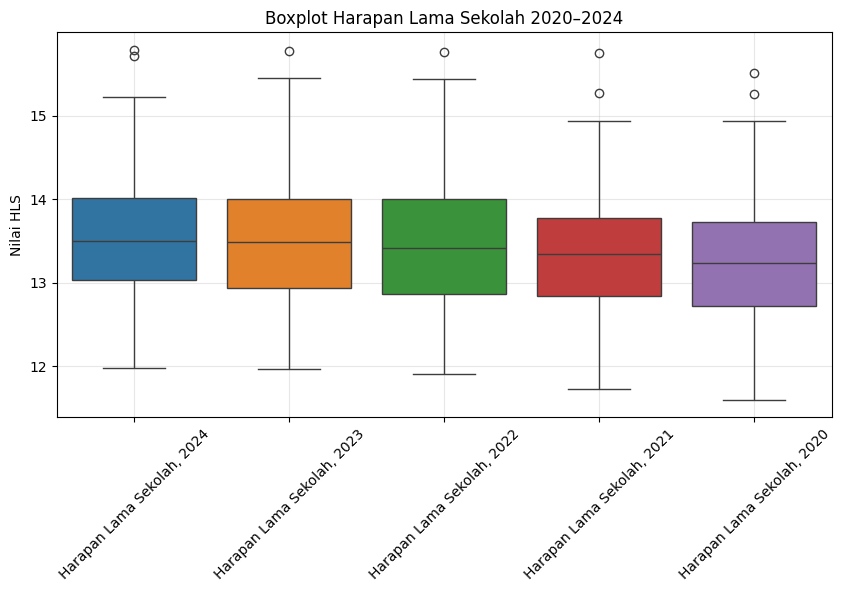

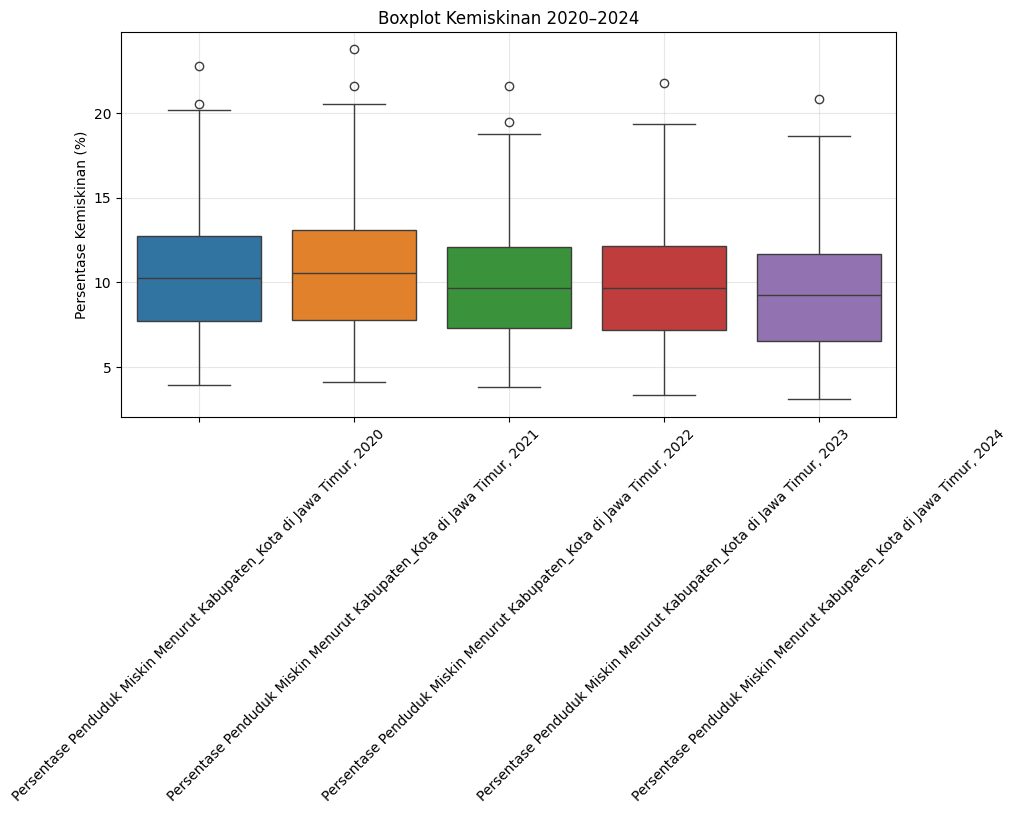

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned_final[hls_cols])
plt.title("Boxplot Harapan Lama Sekolah 2020–2024")
plt.ylabel("Nilai HLS")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned_final[miskin_cols])
plt.title("Boxplot Kemiskinan 2020–2024")
plt.ylabel("Persentase Kemiskinan (%)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Tren rata-rata HLS dan kemiskinan

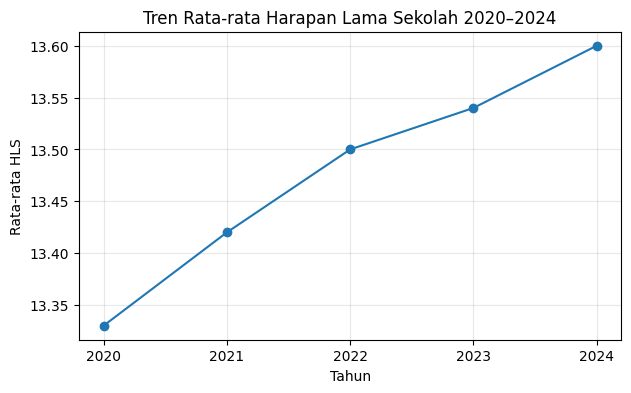

In [ ]:
tahun = np.array([2020, 2021, 2022, 2023, 2024])
rata_hls = np.array([13.33, 13.42, 13.50, 13.54, 13.60])

plt.figure(figsize=(7,4))
plt.plot(tahun, rata_hls, marker='o')
plt.title("Tren Rata-rata Harapan Lama Sekolah 2020–2024")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata HLS")

plt.xticks(tahun, labels=[str(t) for t in tahun])

plt.grid(True, alpha=0.3)
plt.show()

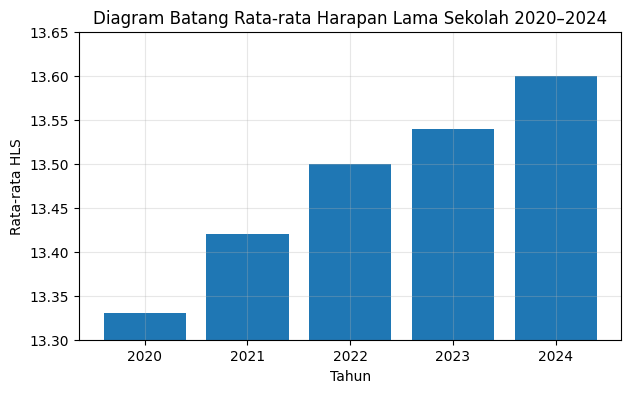

In [ ]:
tahun = np.array([2020, 2021, 2022, 2023, 2024])
rata_hls = np.array([13.33, 13.42, 13.50, 13.54, 13.60])

plt.figure(figsize=(7,4))
plt.bar(tahun, rata_hls)

plt.title("Diagram Batang Rata-rata Harapan Lama Sekolah 2020–2024")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata HLS")

plt.xticks(tahun, labels=[str(t) for t in tahun])

plt.ylim(13.3, 13.65)

plt.grid(True, alpha=0.3)
plt.show()

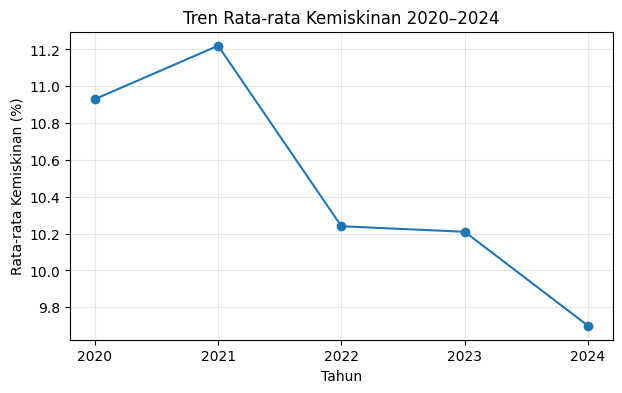

In [ ]:
tahun = np.array([2020, 2021, 2022, 2023, 2024])

rata_kemiskinan = np.array([10.93, 11.22, 10.24, 10.21, 9.70])

plt.figure(figsize=(7,4))
plt.plot(tahun, rata_kemiskinan, marker='o')
plt.title("Tren Rata-rata Kemiskinan 2020–2024")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Kemiskinan (%)")

plt.xticks(tahun, labels=[str(t) for t in tahun])

plt.grid(True, alpha=0.3)
plt.show()

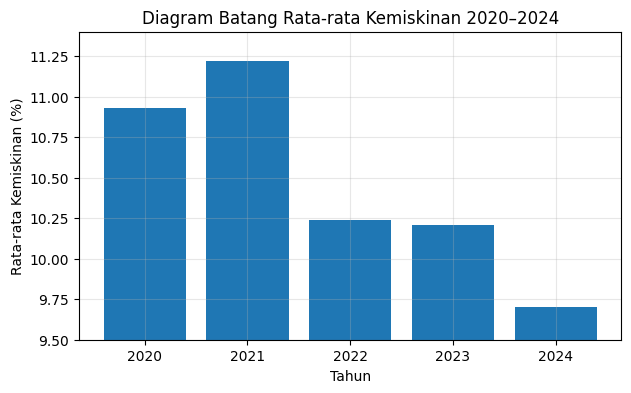

In [ ]:
tahun = np.array([2020, 2021, 2022, 2023, 2024])
rata_kemiskinan = np.array([10.93, 11.22, 10.24, 10.21, 9.70])

plt.figure(figsize=(7,4))
plt.bar(tahun, rata_kemiskinan)

plt.title("Diagram Batang Rata-rata Kemiskinan 2020–2024")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Kemiskinan (%)")

plt.xticks(tahun, labels=[str(t) for t in tahun])

plt.ylim(9.5, 11.4)

plt.grid(True, alpha=0.3)
plt.show()

# Scatterplot hubungan HLS dan kemiskinan setiap tahun

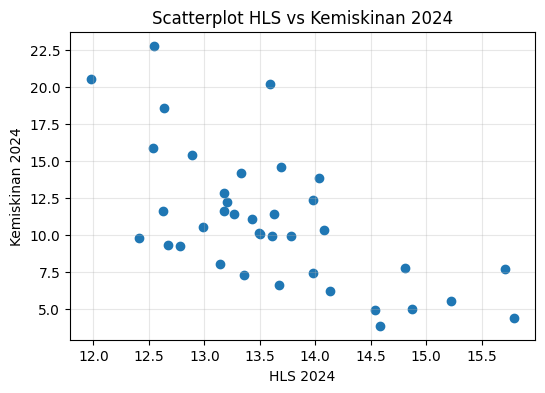

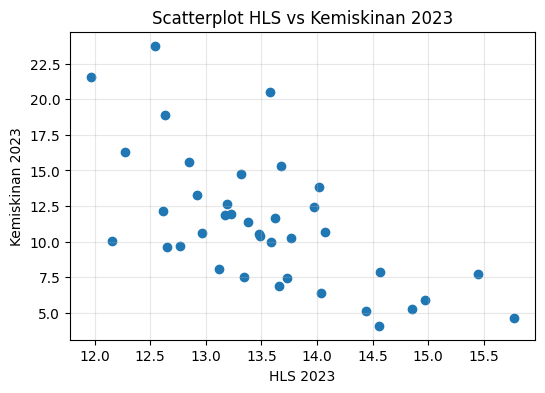

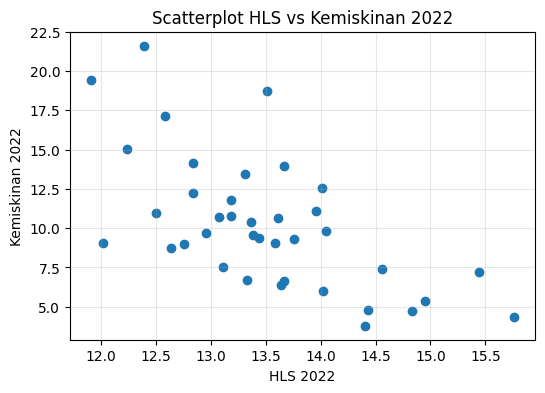

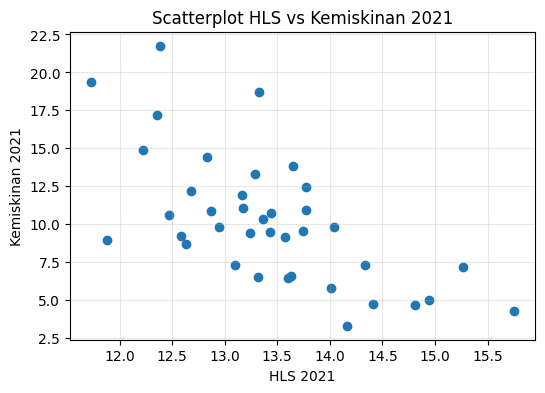

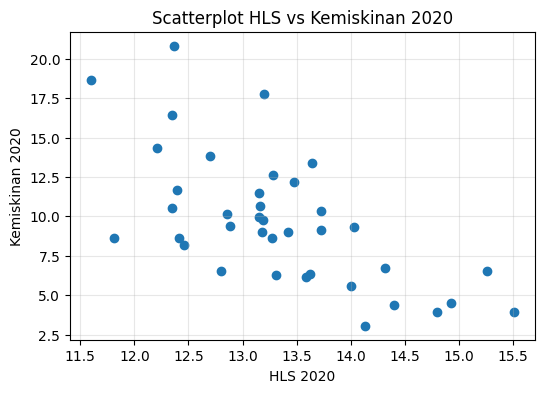

In [ ]:
hls_cols = [c for c in df_cleaned_final.columns if "Harapan Lama Sekolah" in c]
miskin_cols = [c for c in df_cleaned_final.columns if "Penduduk Miskin" in c]

for h, m in zip(hls_cols, miskin_cols):
    tahun = h[-4:]
    plt.figure(figsize=(6,4))
    plt.scatter(df_cleaned_final[h], df_cleaned_final[m])
    plt.xlabel(f"HLS {tahun}")
    plt.ylabel(f"Kemiskinan {tahun}")
    plt.title(f"Scatterplot HLS vs Kemiskinan {tahun}")
    plt.grid(True, alpha=0.3)
    plt.show()

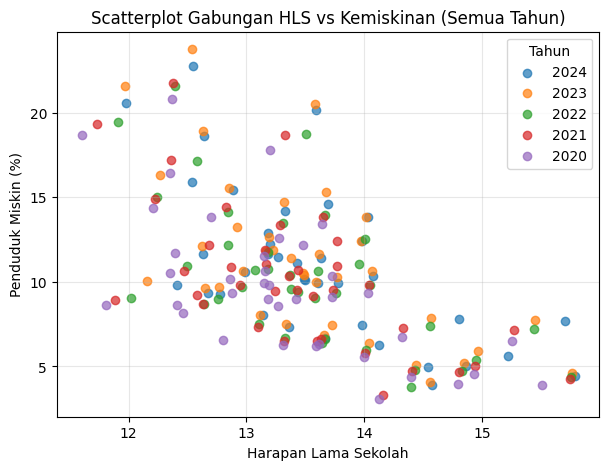

In [ ]:
hls_cols = [c for c in df_cleaned_final.columns if "Harapan Lama Sekolah" in c]
miskin_cols = [c for c in df_cleaned_final.columns if "Penduduk Miskin" in c]

plt.figure(figsize=(7,5))

for h, m in zip(hls_cols, miskin_cols):
    tahun = h[-4:]
    plt.scatter(df_cleaned_final[h], df_cleaned_final[m], alpha=0.7, label=tahun)

plt.xlabel("Harapan Lama Sekolah")
plt.ylabel("Penduduk Miskin (%)")
plt.title("Scatterplot Gabungan HLS vs Kemiskinan (Semua Tahun)")
plt.legend(title="Tahun")
plt.grid(True, alpha=0.3)
plt.show()

# Korelasi

In [ ]:
df_corr = df_cleaned_final.select_dtypes(include='number').corr()
df_corr

,"Harapan Lama Sekolah, 2024","Harapan Lama Sekolah, 2023","Harapan Lama Sekolah, 2022","Harapan Lama Sekolah, 2021","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2020","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2021","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2022","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2023","Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2024","Harapan Lama Sekolah, 2020"
"Harapan Lama Sekolah, 2024",1.000000,0.994547,0.992846,0.985377,-0.646373,-0.649849,-0.645252,-0.650210,-0.658172,0.980124
"Harapan Lama Sekolah, 2023",0.994547,1.000000,0.998875,0.992569,-0.637448,-0.640620,-0.636450,-0.640467,-0.648799,0.985812
"Harapan Lama Sekolah, 2022",0.992846,0.998875,1.000000,0.995229,-0.638226,-0.641862,-0.637499,-0.640803,-0.649380,0.987433
"Harapan Lama Sekolah, 2021",0.985377,0.992569,0.995229,1.000000,-0.653202,-0.655779,-0.651204,-0.653784,-0.661829,0.993693
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2020",-0.646373,-0.637448,-0.638226,-0.653202,1.000000,0.999226,0.998786,0.998107,0.997552,-0.647782
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2021",-0.649849,-0.640620,-0.641862,-0.655779,0.999226,1.000000,0.999617,0.998752,0.998392,-0.649198
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2022",-0.645252,-0.636450,-0.637499,-0.651204,0.998786,0.999617,1.000000,0.999249,0.998738,-0.644866
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2023",-0.650210,-0.640467,-0.640803,-0.653784,0.998107,0.998752,0.999249,1.000000,0.999226,-0.647426
"Persentase Penduduk Miskin Menurut Kabupaten_Kota di Jawa Timur, 2024",-0.658172,-0.648799,-0.649380,-0.661829,0.997552,0.998392,0.998738,0.999226,1.000000,-0.654762
"Harapan Lama Sekolah, 2020",0.980124,0.985812,0.987433,0.993693,-0.647782,-0.649198,-0.644866,-0.647426,-0.654762,1.000000


# Heatmap korelasi

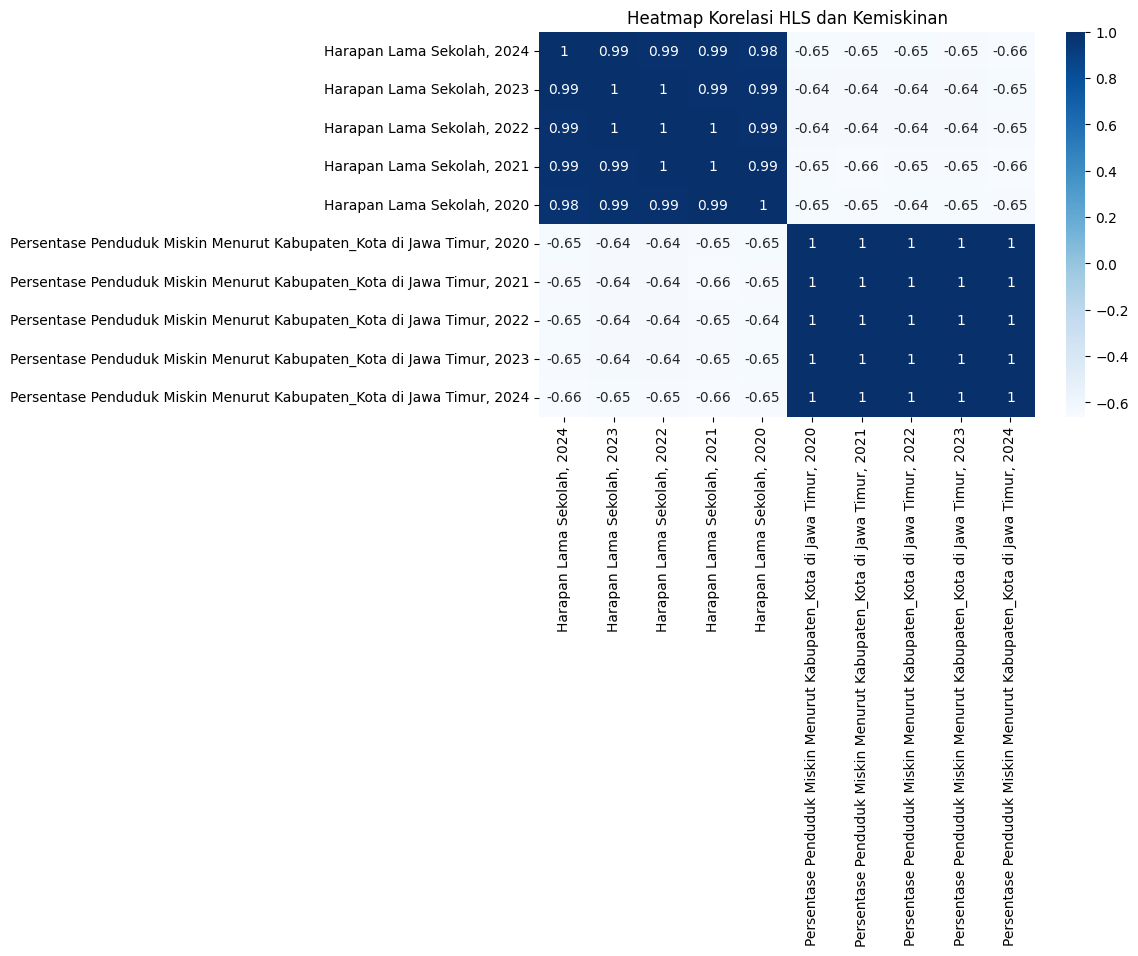

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df_cleaned_final[hls_cols + miskin_cols].corr(), annot=True, cmap="Blues")
plt.title("Heatmap Korelasi HLS dan Kemiskinan")
plt.show()

# Regresi

In [ ]:
summary_table = []

for h, m in zip(hls_cols, miskin_cols):
    X = sm.add_constant(df_cleaned_final[h])
    y = df_cleaned_final[m]

    model = sm.OLS(y, X).fit()

    tahun = h[-4:]
    coef = model.params[h]
    pval = model.pvalues[h]
    r2 = model.rsquared

    summary_table.append([tahun, coef, pval, r2])

summary_df = pd.DataFrame(summary_table, columns=["Tahun", "Koefisien", "p-value", "R-squared"])
print(summary_df)

  Tahun  Koefisien   p-value  R-squared
0  2024  -3.285859  0.000012   0.417799
1  2023  -3.429463  0.000015   0.410394
2  2022  -3.034806  0.000017   0.406405
3  2021  -3.136933  0.000009   0.427433
4  2020  -3.005409  0.000008   0.428713


In [ ]:
ringkasan_hls = []

for col in hls_cols:
    tahun = col[-4:]

    df_tmp = df_cleaned_final[['daerah', col]].dropna()

    max_row = df_tmp.loc[df_tmp[col].idxmax()]
    min_row = df_tmp.loc[df_tmp[col].idxmin()]

    ringkasan_hls.append([
        tahun,
        max_row['daerah'], max_row[col],
        min_row['daerah'], min_row[col]
    ])

ringkasan_hls_df = pd.DataFrame(
    ringkasan_hls,
    columns=[
        "Tahun",
        "HLS Tertinggi (Daerah)", "Nilai HLS Tertinggi",
        "HLS Terendah (Daerah)", "Nilai HLS Terendah"
    ]
)

ringkasan_hls_df

,Tahun,HLS Tertinggi (Daerah),Nilai HLS Tertinggi,HLS Terendah (Daerah),Nilai HLS Terendah
0,2024,Kota Malang,15.79,Bangkalan,11.98
1,2023,Kota Malang,15.77,Bangkalan,11.97
2,2022,Kota Malang,15.76,Bangkalan,11.91
3,2021,Kota Malang,15.75,Bangkalan,11.73
4,2020,Kota Malang,15.51,Bangkalan,11.60


In [ ]:
ringkasan_miskin = []

for col in miskin_cols:
    tahun = col[-4:]

    df_tmp = df_cleaned_final[['daerah', col]].dropna()

    max_row = df_tmp.loc[df_tmp[col].idxmax()]
    min_row = df_tmp.loc[df_tmp[col].idxmin()]

    ringkasan_miskin.append([
        tahun,
        max_row['daerah'], max_row[col],
        min_row['daerah'], min_row[col]
    ])

ringkasan_miskin_df = pd.DataFrame(
    ringkasan_miskin,
    columns=[
        "Tahun",
        "Kemiskinan Tertinggi (Daerah)", "Persentase Tertinggi",
        "Kemiskinan Terendah (Daerah)", "Persentase Terendah"
    ]
)

ringkasan_miskin_df

,Tahun,Kemiskinan Tertinggi (Daerah),Persentase Tertinggi,Kemiskinan Terendah (Daerah),Persentase Terendah
0,2020,Sampang,22.78,Kota Batu,3.89
1,2021,Sampang,23.76,Kota Batu,4.09
2,2022,Sampang,21.61,Kota Batu,3.79
3,2023,Sampang,21.76,Kota Batu,3.31
4,2024,Sampang,20.83,Kota Batu,3.06
